# Fraud Detection:

# Step 1: Import Liabraries:

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting graphs and charts
import seaborn as sns # statistical graphics
from sklearn.preprocessing import StandardScaler # Standardizes features
from sklearn.model_selection import train_test_split # Splits the dataset into training and testing sets. 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, roc_auc_score,auc
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Step 2: Loading the dataset

In [11]:
# load the dataset
Data=pd.read_csv('Fraud_Analysis_Dataset.csv')

## Step 3: Data Preprocessing:

In [12]:
# printing the first 5 rows of the dataset
print(Data.head())

   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0             0.0        1  
1    C38997010         21182.0             0.0        1  
2   C972765878             0.0             0.0        1  
3  C1007251739         26202.0             0.0        1  
4  C1848415041             0.0             0.0        1  


In [13]:
# printing the last 5 rows of the dataset
print(Data.tail())

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
11137     7     DEBIT    6393.71  C1331144930      433084.38       426690.68   
11138     7  CASH_OUT  298799.54   C932023579      426690.68       127891.14   
11139     7  CASH_OUT  423159.63    C61395726      127891.14            0.00   
11140     7   PAYMENT    1094.03  C1224570697       13918.00        12823.97   
11141     7   PAYMENT    9235.58  C1637966097       39963.00        30727.42   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  
11137   C684896216       478421.00       210535.25        0  
11138  C1761353343       704355.36      5270364.19        0  
11139  C1298316171       610479.00       749621.53        0  
11140   M983553548            0.00            0.00        0  
11141   M609545864            0.00            0.00        0  


In [14]:
# number of rows and Columns in this dataset
Data.shape

(11142, 10)

In [15]:
#checking for null values
Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [16]:
# checking for any duplicate values
Data.duplicated().sum()

0

In [17]:
# Remove columns
Data=Data.drop(['nameOrig','nameDest'],axis=1)

In [18]:
# check columns
Data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [19]:
Data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


## Step 3: EDA: Exploratory Data Analysis:

In [21]:
# Check Target Variables
Data['isFraud'].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

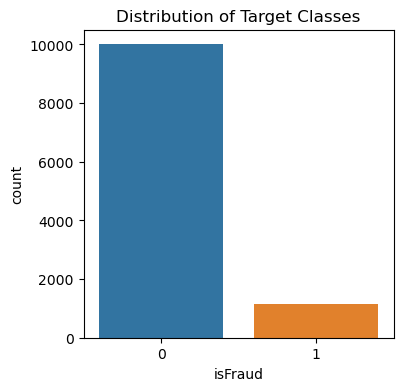

In [22]:
# Create the countplot
plt.figure(figsize=(4,4))
sns.countplot(x='isFraud',data=Data)
plt.xlabel('isFraud')
plt.ylabel('count')
plt.title('Distribution of Target Classes')
plt.show()

As per above anaylsis our data seems imbalanced - having less number of 'No fraud'=[0] transactions compare to the fraud transaction [1].

In [23]:
# Calculate the transaction types
Data['type'].value_counts()

type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

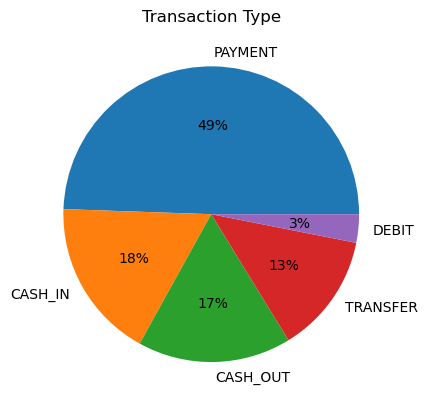

In [24]:
# Count occurrences of each Type
counts = Data['type'].value_counts()

# Plot pie chart
plt.pie(counts, labels=counts.index,autopct='%1.0f%%')

# Set the title
plt.title('Transaction Type')

# Show the plot
plt.show()

Most of the transactions done in the 'Payment' type as its showing higher percentage compare to others

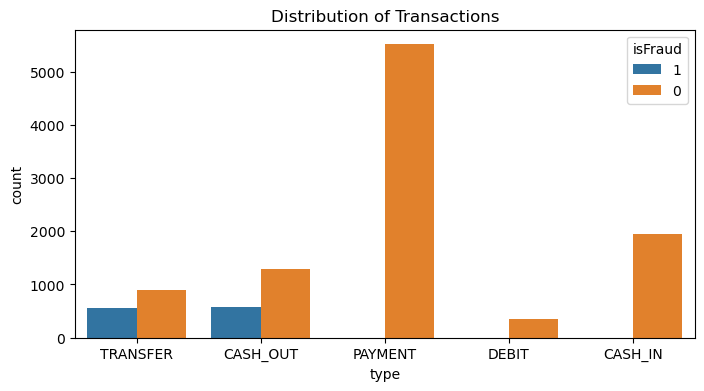

In [25]:
# Analyse the Fraudulent transaction

#set up the plot
Data['isFraud'] =Data['isFraud'].astype(str)
plt.figure(figsize=(8,4))
sns.countplot(x='type',hue='isFraud',data=Data)
plt.xlabel('type')
plt.ylabel('count')
plt.title('Distribution of Transactions')
plt.show()

As per graph we analyse that that the Fraud occured only in the "TRANSFER" and "CASH_OUT" transaction type.

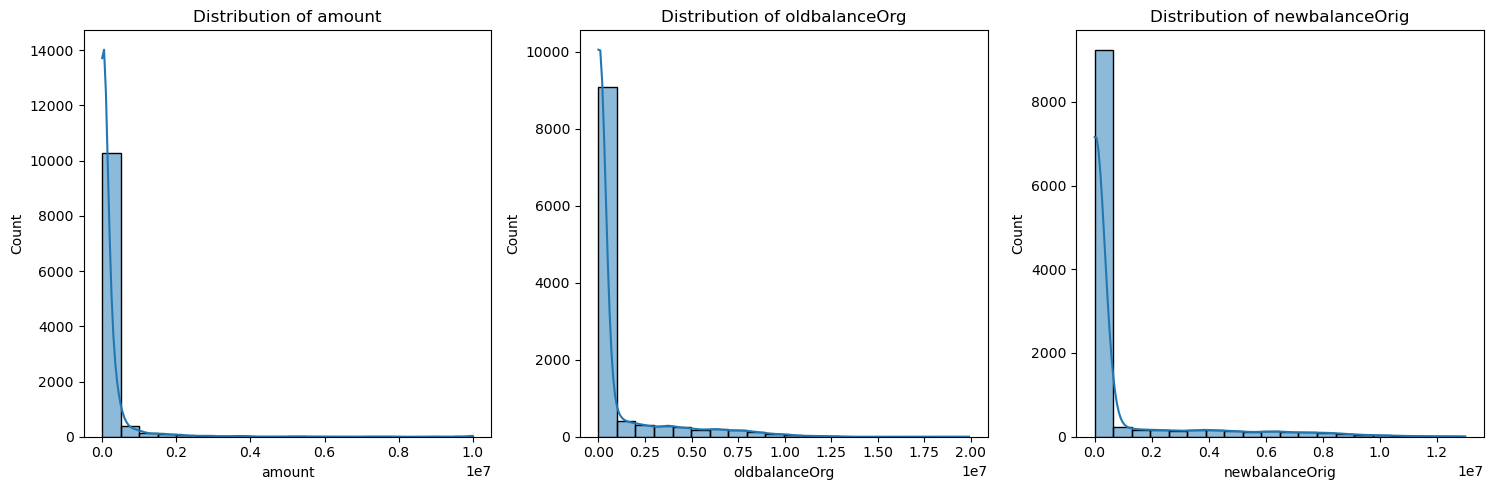

In [27]:
# selecting numerical columns for analysis
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

# plotting distributions of numerical features
plt.figure(figsize=(20, 5))
for i, column in enumerate(numerical_columns,1):
    plt.subplot(1, 4, i)
    sns.histplot(Data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

This analysis forms the basis for understanding numerical feature characteristics, which is essential for making informed decisions in subsequent data processing and modeling stage

## Replacing categorical values into numeric:

In [28]:
# Replace categorical values into numeric for further analysis
Data.replace(to_replace=['TRANSFER', 'CASH_OUT', 'PAYMENT', 'DEBIT', 'CASH_IN'],value=[4,3,1,5,2],inplace=True)
Data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,4,181.0,181.0,0.0,0.0,0.0,1
1,1,3,181.0,181.0,0.0,21182.0,0.0,1
2,1,4,2806.0,2806.0,0.0,0.0,0.0,1
3,1,3,2806.0,2806.0,0.0,26202.0,0.0,1
4,1,4,20128.0,20128.0,0.0,0.0,0.0,1


## Correlation heatmap:

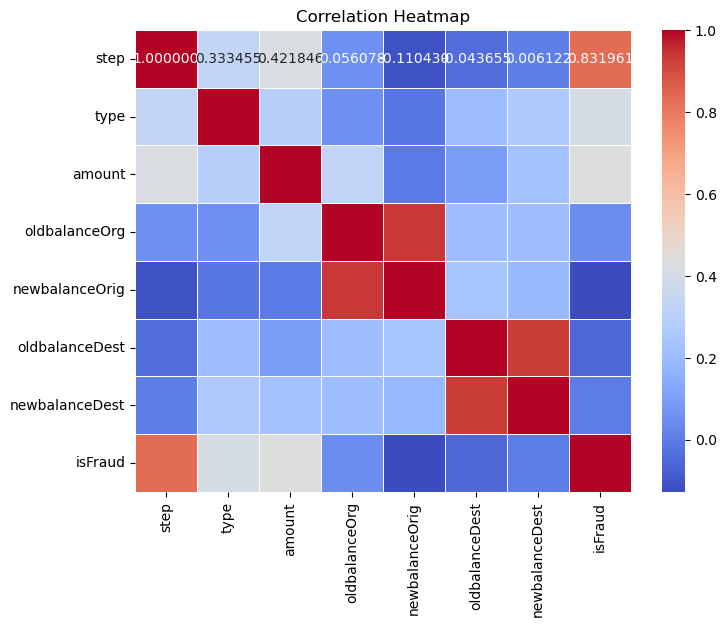

In [30]:
#Visualize a correlation heatmap:
correlation_matrix = Data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='2f',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Step 4: Spliting Data:

In [31]:
# separating the data and labels
x=Data.drop(columns='isFraud',axis=1)
y=Data['isFraud']
print(x)
print(y)

       step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         1     4     181.00         181.00            0.00            0.00   
1         1     3     181.00         181.00            0.00        21182.00   
2         1     4    2806.00        2806.00            0.00            0.00   
3         1     3    2806.00        2806.00            0.00        26202.00   
4         1     4   20128.00       20128.00            0.00            0.00   
...     ...   ...        ...            ...             ...             ...   
11137     7     5    6393.71      433084.38       426690.68       478421.00   
11138     7     3  298799.54      426690.68       127891.14       704355.36   
11139     7     3  423159.63      127891.14            0.00       610479.00   
11140     7     1    1094.03       13918.00        12823.97            0.00   
11141     7     1    9235.58       39963.00        30727.42            0.00   

       newbalanceDest  
0                0.00  
1  

In [32]:
# Split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Standardize the features (scaling)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Step 5: Machine Learning Algorithm

## Logistic Regression:

In [41]:
# define model
model=LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [42]:
# predict the test data
y_pred=model.predict(x_test_scaled)

# Calculate accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy for Logistic Regression',accuracy)

Accuracy for Logistic Regression 0.9856437864513234


In [43]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1999
           1       1.00      0.86      0.93       230

    accuracy                           0.99      2229
   macro avg       0.99      0.93      0.96      2229
weighted avg       0.99      0.99      0.99      2229



In [44]:
# Confusion Matrix
confusion=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[1999    0]
 [  32  198]]


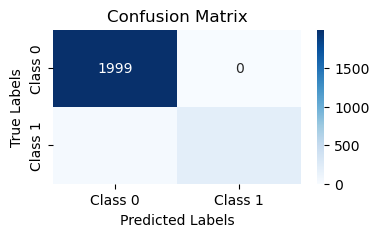

In [45]:
plt.figure(figsize=(4, 2))

# Create a heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Evaluate the performance of a classification model by summarizing its ROC curve
roc_auc_score(y_test,y_pred)

0.9304347826086956

The model performs exceptionally well, especially for Class 0, with high precision, recall, and F1-score. For Class 1, while the precision is perfect, the recall is slightly lower, which impacts its F1-score. The overall accuracy and weighted metrics are strong, indicating that the model is effective overall, though it might be slightly biased towards the more frequent class (Class 0

## ROC Curve:

In [47]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

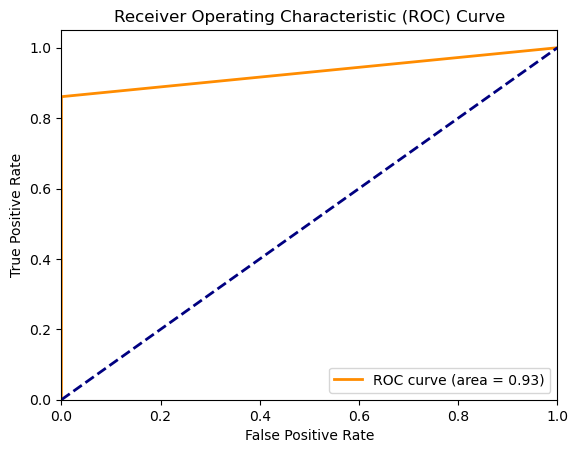

In [51]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest:

In [52]:
# define model
model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [53]:
# predict the test data
y_pred=model.predict(x_test_scaled)

# Calculate accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy for Random Forest',accuracy)

Accuracy for Random Forest 0.9950650515926425


In [54]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       1.00      0.95      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [55]:
# Confusion Matrix
confusion=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[1999    0]
 [  11  219]]


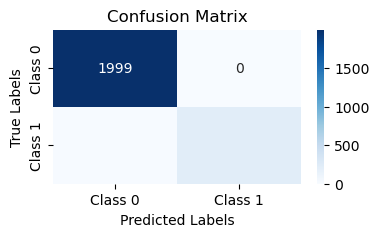

In [56]:
plt.figure(figsize=(4, 2))

# Create a heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Evaluate the performance of a classification model by summarizing its ROC curve
roc_auc_score(y_test,y_pred)

0.9760869565217392

The model achieves perfect accuracy and precision, and very high recall and F1-scores across both classes. This suggests that the model is both accurate and reliable, handling both the majority and minority classes with excellent performance.

## Ada Boost:

In [58]:
# define model
model=AdaBoostClassifier()
model.fit(x_train_scaled,y_train)

AdaBoostClassifier()

In [59]:
# predict the test data
y_pred=model.predict(x_test_scaled)

# Calculate accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy for Ada Boost',accuracy)

Accuracy for Ada Boost 0.9950650515926425


In [60]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.99      0.97      0.98       230

    accuracy                           1.00      2229
   macro avg       0.99      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [61]:
# Confusion Matrix
confusion=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[1996    3]
 [   8  222]]


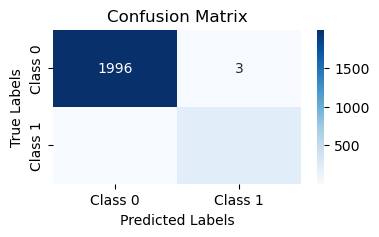

In [62]:
plt.figure(figsize=(4, 2))

# Create a heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
# Evaluate the performance of a classification model by summarizing its ROC curve
roc_auc_score(y_test,y_pred)

0.9818583204645801

The model performs exceptionally well. It has perfect accuracy, precision, and recall for the majority class (Class 0), and very high performance for the minority class (Class 1). The average metrics also reflect high overall performance, making this model highly effective.

## Gradient Boosting:

In [64]:
# define model
model=GradientBoostingClassifier()
model.fit(x_train_scaled,y_train)

GradientBoostingClassifier()

In [65]:
# predict the test data
y_pred=model.predict(x_test_scaled)

# calculate accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy for Gradient Boosting',accuracy)

Accuracy for Gradient Boosting 0.9950650515926425


In [66]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       1.00      0.95      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [67]:
# Confusion Matrix
confusion=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[1999    0]
 [  11  219]]


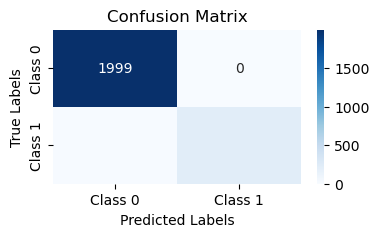

In [68]:
plt.figure(figsize=(4, 2))

# Create a heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [69]:
# Evaluate the performance of a classification model by summarizing its ROC curve
roc_auc_score(y_test,y_pred)

0.9760869565217392

- Detailed Analysis

Random Forest, Gradient Boosting, and AdaBoost:
These models achieved perfect or near-perfect scores for class 0 and very high scores for class 1. They performed well in identifying both classes with high precision, recall, and F1 scores.

## Step 6:Model Deployment:

In [70]:
import pickle

In [71]:
filename='trained_model.sav' # save model
pickle.dump(model,open(filename,'wb')) # write binary

In [72]:
loaded_model=pickle.load(open('trained_model.sav','rb')) # read binary

In [73]:
input_data = (1,4,181.00,181.00,0.00,0.00,0.00)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('No Fraud')
else:
  print('Fraud')

[1]
Fraud


Here our model predicted the transaction correctly over the input data